## Water Potability Detector.

In [1]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import os
df = pd.read_csv(os.getcwd()+'\\dataset\\water_potability.csv')

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.17706,7.509306,NaN,327.459761,16.140368,78.698446,2.309149,1


In [5]:
df.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [6]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
df.describe().to_csv(f'{os.getcwd()}\\dataset\\DescriptiveStats.csv')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


<Axes: xlabel='Potability', ylabel='count'>

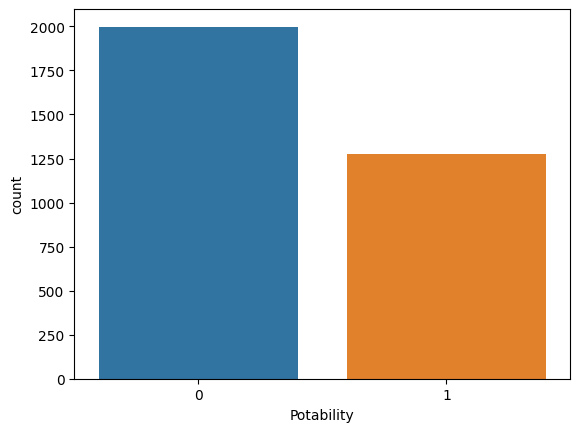

In [59]:
import seaborn as sns

sns.countplot(data=df,x='Potability')

<Axes: >

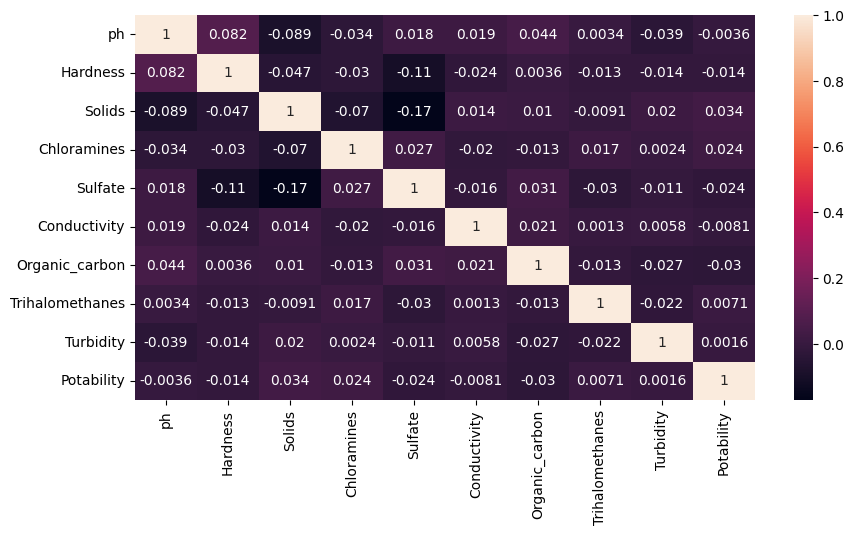

In [60]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

## None of the features have a high correlation

## checking missing values 

In [61]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

## Appling Feature Enginnering 

In [62]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [63]:
df['ph']=df['ph'].fillna(df['ph'].median())
df['Sulfate']=df['Sulfate'].fillna(df['Sulfate'].median())
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df['Trihalomethanes'].median())

In [64]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [65]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [66]:
X = df.drop('Potability',axis=1)
y=df['Potability']

In [67]:
# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X , y = resample.fit_resample(X, y)

<Axes: xlabel='Potability', ylabel='count'>

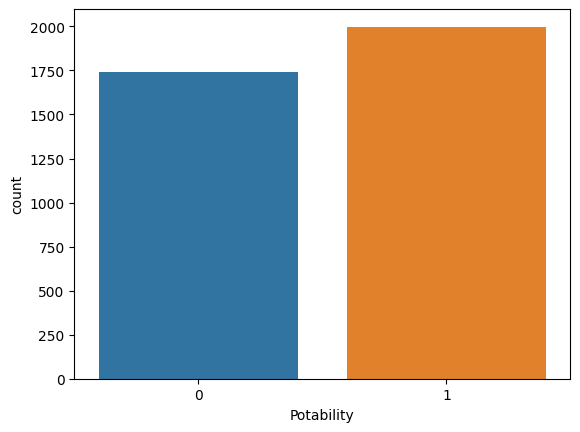

In [68]:
import seaborn as sns

sns.countplot(x=y)

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [70]:
## standardize the dataset Train independent data
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test) 


In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

## Automate Model Training Process
models={
    'Random Forest':RandomForestClassifier(n_estimators=200),
    'Decision Tree':DecisionTreeClassifier(),
    'SVC':SVC(),
    'NB':GaussianNB(),
    'LR':LogisticRegression(),
    'AB':AdaBoostClassifier(n_estimators=100)

}
from sklearn.metrics import accuracy_score


def evaluate_model(X_train,y_train,X_test,y_test,models):
    
    report = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        # Train model
        model.fit(X_train,y_train)

        # Predict Testing data
        y_test_pred =model.predict(X_test)

        # Get accuracy for test data prediction
       
        test_model_score = accuracy_score(y_test,y_test_pred)

        report[list(models.keys())[i]] =  test_model_score
            
    return report
    
evaluate_model(X_train,y_train,X_test,y_test,models)

{'Random Forest': 0.6842105263157895,
 'Decision Tree': 0.5927125506072874,
 'SVC': 0.6704453441295547,
 'NB': 0.5668016194331984,
 'LR': 0.5141700404858299,
 'AB': 0.5619433198380567}

## RandomForest Gives the Best Acuuracy we will select it .

In [75]:
classifier = RandomForestClassifier(n_estimators=200)
classifier.fit(X_train,y_train)
classifier.score(X_test,y_test)

0.7004048582995951

In [81]:
data = numpy.array([[4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821]])

data = scaler.transform(data) 

classifier.predict(data)[0]

1

In [83]:
data = numpy.array([[8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771]])

data = scaler.transform(data) 

classifier.predict(data)[0]

0

In [84]:
import pickle

pickle.dump(scaler,open(f'{os.getcwd()}\\articrafts\\scaler.pkl','wb'))
pickle.dump(classifier,open(f'{os.getcwd()}\\articrafts\\model.pkl','wb'))